In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve,average_precision_score

from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [150]:
df=pd.read_excel('/content/tuberculosis dataset.xlsx',header=1)
df.to_csv('tuberculosis dataset.csv', index=False)
df=pd.read_csv('/content/tuberculosis dataset.csv')
df.head()
print(df.head())
print(df.info())

   CO  NS  BD  FV  CP  SP  IS  LP  CH  LC  IR  LA  LE  LNE  SBP  BMI
0   0   2   2   1   2   0   1   1   1   2   2   1   1    1    0    0
1   0   0   2   0   1   1   0   1   0   2   2   0   0    0    2    1
2   1   1   2   0   2   0   1   2   2   2   0   1   0    2    2    0
3   0   0   1   2   0   0   1   0   0   1   1   0   1    1    1    0
4   1   2   1   1   0   2   2   1   0   1   2   0   2    0    1    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CO      492 non-null    int64
 1   NS      492 non-null    int64
 2   BD      492 non-null    int64
 3   FV      492 non-null    int64
 4   CP      492 non-null    int64
 5   SP      492 non-null    int64
 6   IS      492 non-null    int64
 7   LP      492 non-null    int64
 8   CH      492 non-null    int64
 9   LC      492 non-null    int64
 10  IR      492 non-null    int64
 11  LA      492 non-null 

In [151]:
print(df.head())
print(df.info())
print(df.describe())


   CO  NS  BD  FV  CP  SP  IS  LP  CH  LC  IR  LA  LE  LNE  SBP  BMI
0   0   2   2   1   2   0   1   1   1   2   2   1   1    1    0    0
1   0   0   2   0   1   1   0   1   0   2   2   0   0    0    2    1
2   1   1   2   0   2   0   1   2   2   2   0   1   0    2    2    0
3   0   0   1   2   0   0   1   0   0   1   1   0   1    1    1    0
4   1   2   1   1   0   2   2   1   0   1   2   0   2    0    1    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 492 entries, 0 to 491
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   CO      492 non-null    int64
 1   NS      492 non-null    int64
 2   BD      492 non-null    int64
 3   FV      492 non-null    int64
 4   CP      492 non-null    int64
 5   SP      492 non-null    int64
 6   IS      492 non-null    int64
 7   LP      492 non-null    int64
 8   CH      492 non-null    int64
 9   LC      492 non-null    int64
 10  IR      492 non-null    int64
 11  LA      492 non-null 

In [152]:
df.shape

(492, 16)

In [153]:
# Renaming columns with meaningful names
df.columns = [
    "Cough", "Night_Sweats", "Blood_in_Sputum", "Fever", "Chest_Pain",
    "Sputum_Production", "Immune_Status", "Lymphadenopathy", "Chills", "Lung_Condition",
    "Immune_Response", "Loss_of_Appetite", "Lethargy", "Lung_Exam", "Systolic_BP", "BMI"
]

print(df.head())


   Cough  Night_Sweats  Blood_in_Sputum  Fever  Chest_Pain  Sputum_Production  \
0      0             2                2      1           2                  0   
1      0             0                2      0           1                  1   
2      1             1                2      0           2                  0   
3      0             0                1      2           0                  0   
4      1             2                1      1           0                  2   

   Immune_Status  Lymphadenopathy  Chills  Lung_Condition  Immune_Response  \
0              1                1       1               2                2   
1              0                1       0               2                2   
2              1                2       2               2                0   
3              1                0       0               1                1   
4              2                1       0               1                2   

   Loss_of_Appetite  Lethargy  Lung_Exam  Sy

In [154]:
from imblearn.over_sampling import SMOTE

# Define the TB_Diagnosis column
df["TB_Diagnosis"] = (
    (df["Cough"] >= 2) &
    (df["Fever"] >= 2) &
    (df["Blood_in_Sputum"] >= 2)&
    (df["Chest_Pain"] >= 2)
).astype(int)

# Separate features (X) and target (y)
X = df.drop("TB_Diagnosis", axis=1)
y = df["TB_Diagnosis"]

# Apply SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

print("Original target distribution:")
print(y.value_counts())
print("\nResampled target distribution (SMOTE):")
print(y_res.value_counts())

Original target distribution:
TB_Diagnosis
0    470
1     22
Name: count, dtype: int64

Resampled target distribution (SMOTE):
TB_Diagnosis
0    470
1    470
Name: count, dtype: int64


In [155]:
df["TB_Diagnosis"] = (
    (2*(df["Cough"] >= 1).astype(int) +
     2*(df["Blood_in_Sputum"] >= 1).astype(int) +
     (df["Fever"] >= 1).astype(int) +
     (df["Chest_Pain"] >= 1).astype(int) +
     (df["Night_Sweats"] >= 1).astype(int)) >= 4
).astype(int)

print(df["TB_Diagnosis"].value_counts())
print(df["TB_Diagnosis"].value_counts(normalize=True)*100)


TB_Diagnosis
1    451
0     41
Name: count, dtype: int64
TB_Diagnosis
1    91.666667
0     8.333333
Name: proportion, dtype: float64


In [156]:
print(df.head())
print(df["TB_Diagnosis"].value_counts())


   Cough  Night_Sweats  Blood_in_Sputum  Fever  Chest_Pain  Sputum_Production  \
0      0             2                2      1           2                  0   
1      0             0                2      0           1                  1   
2      1             1                2      0           2                  0   
3      0             0                1      2           0                  0   
4      1             2                1      1           0                  2   

   Immune_Status  Lymphadenopathy  Chills  Lung_Condition  Immune_Response  \
0              1                1       1               2                2   
1              0                1       0               2                2   
2              1                2       2               2                0   
3              1                0       0               1                1   
4              2                1       0               1                2   

   Loss_of_Appetite  Lethargy  Lung_Exam  Sy

In [157]:
print(df["TB_Diagnosis"].value_counts())
print(df["TB_Diagnosis"].value_counts(normalize=True)*100)


TB_Diagnosis
1    451
0     41
Name: count, dtype: int64
TB_Diagnosis
1    91.666667
0     8.333333
Name: proportion, dtype: float64


In [158]:
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.2, random_state=42, stratify=y_res
)

In [159]:
#logistic regression
model=LogisticRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[90  4]
 [ 0 94]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        94
           1       0.96      1.00      0.98        94

    accuracy                           0.98       188
   macro avg       0.98      0.98      0.98       188
weighted avg       0.98      0.98      0.98       188



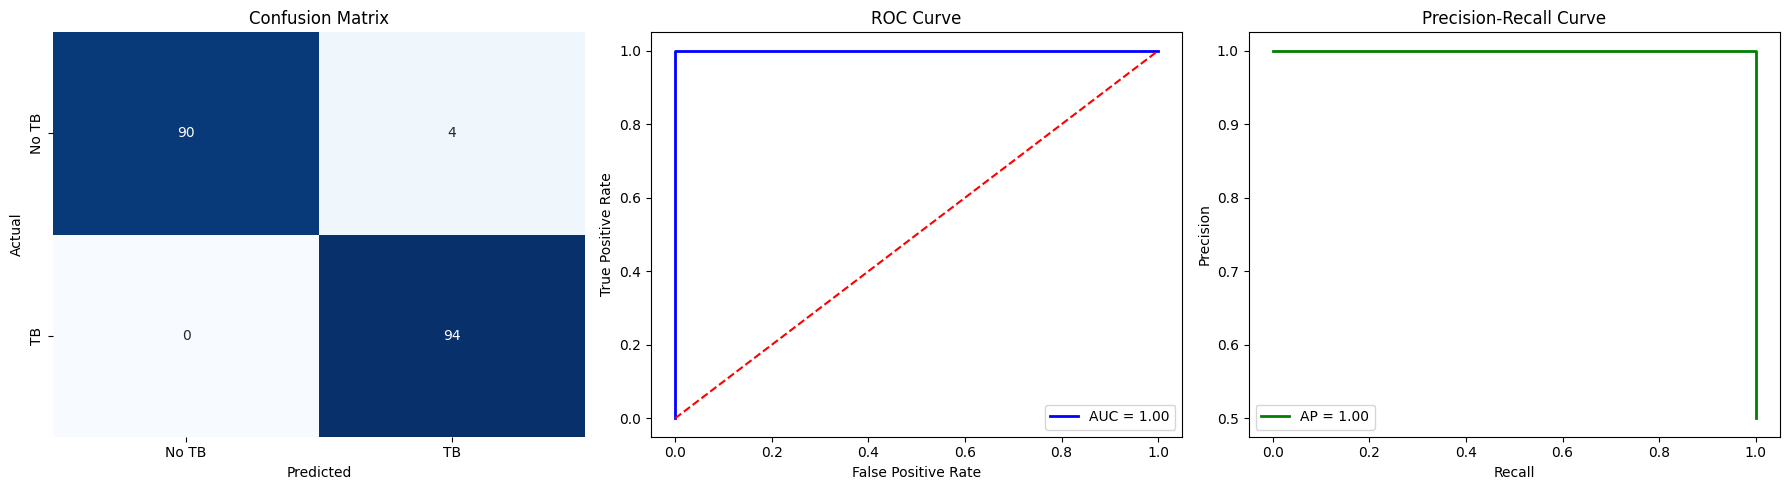

In [161]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# --- ROC Curve ---
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# --- Precision-Recall Curve ---
precision, recall, _ = precision_recall_curve(y_test, y_prob)
avg_precision = average_precision_score(y_test, y_prob)

# --- Combined Plot ---
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Confusion Matrix Heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["No TB", "TB"], yticklabels=["No TB", "TB"], ax=axes[0])
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
axes[0].set_title("Confusion Matrix")

# 2. ROC Curve
axes[1].plot(fpr, tpr, color="blue", lw=2, label=f"AUC = {roc_auc:.2f}")
axes[1].plot([0, 1], [0, 1], color="red", linestyle="--")
axes[1].set_xlabel("False Positive Rate")
axes[1].set_ylabel("True Positive Rate")
axes[1].set_title("ROC Curve")
axes[1].legend(loc="lower right")

# 3. Precision-Recall Curve
axes[2].plot(recall, precision, color="green", lw=2, label=f"AP = {avg_precision:.2f}")
axes[2].set_xlabel("Recall")
axes[2].set_ylabel("Precision")
axes[2].set_title("Precision-Recall Curve")
axes[2].legend(loc="lower left")

plt.tight_layout()
plt.show()
